In [1]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram


%run new_DataAnalysis.ipynb

In [2]:
mc = testDataAnalysis(load=True, eventfile="./data/new_moo/MC_events.csv", clusterfile="./data/new_moo/MC_clusters.csv")
moo = testDataAnalysis(load=True, eventfile="./data/new_moo/events.csv", clusterfile="./data/new_moo/clusters.csv")

In [175]:
naive = testDataAnalysis()
naive.load_eventdf("./data/new_moo/events.csv")
naive.make_clusterdf(basicfit=True)

In [177]:
mc.filter_fit(100,5)
naive.filter_fit(100,5)
moo.filter_fit(100,5)
#mc.clusterdf = mc.clusterdf[mc.clusterdf['Channels'] <= 5]
#naive.clusterdf = naive.clusterdf[naive.clusterdf['Channels'] <= 5]
#moo.clusterdf = moo.clusterdf[moo.clusterdf['Channels'] <= 5]

In [178]:
#moo.clusterdf = moo.clusterdf[moo.clusterdf['MissingCh'] == 0]
#moo.clusterdf = moo.clusterdf[moo.clusterdf['ExtraCh'] == 0]

#mc.clusterdf = mc.clusterdf[mc.clusterdf['Cluster'].isin(moo.clusterdf['Cluster'].values)]
#naive.clusterdf = naive.clusterdf[naive.clusterdf['Cluster'].isin(moo.clusterdf['Cluster'].values)]




Text(0, 0.5, 'Number of Channels')

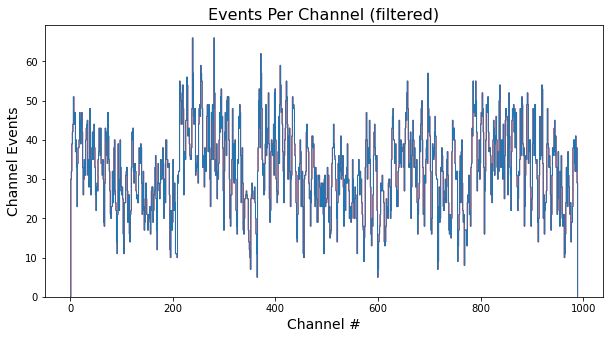

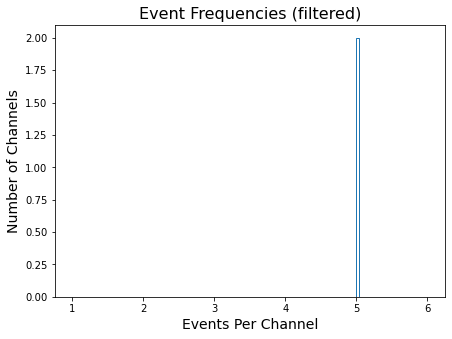

In [179]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
array1=plt.hist(moo.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array1 = plt.hist(mc.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.linspace(1,6,100), histtype='step')
#plt.hist(array2[0], np.linspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [180]:
#print("Messy cluster rate: " + str(naive.get_clusterrate()))
print("Messy cluster rate: " + str(moo.get_clusterrate()))
#data.filter_clusterdf(100, 5) #(NRMSE, channels)
#print("Filtered cluster rate: " + str(data.get_clusterrate()))
print("MC cluster rate: " + str(mc.get_clusterrate()))

clusters: 3611
run time: 2636943.0
Messy cluster rate: 0.0013693887201960755
clusters: 3611
run time: 2636943.0
MC cluster rate: 0.0013693887201960755


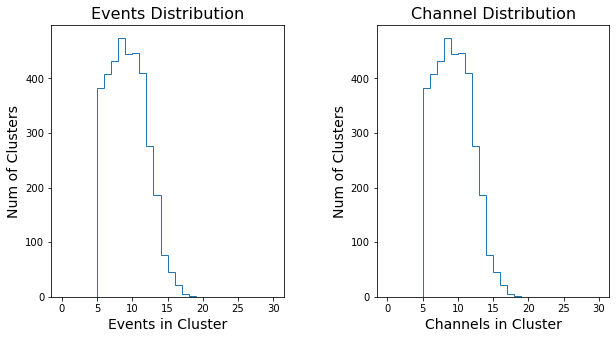

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(mc.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(mc.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step')


#plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

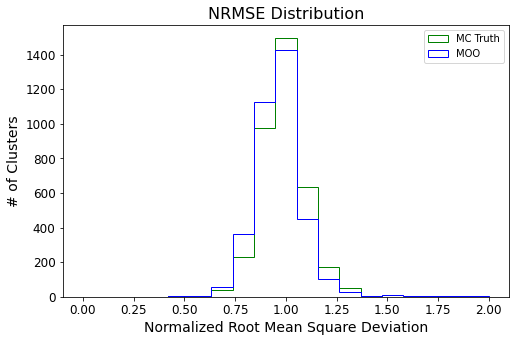

In [197]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(mc.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='g', label="MC Truth")

array=plt.hist(moo.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='b' , label="MOO")

#array=plt.hist(naive.get_clusterdf()['NRMSE'], np.linspace(0,2,20), histtype='step', color='r', label="PCA")

plt.legend()

#line = plt.axvline(1)

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

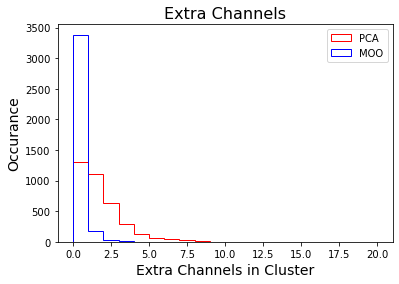

In [183]:
plt.figure()
plt.title("Extra Channels", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(naive.get_clusterdf()['ExtraCh'], np.linspace(0,20,21), color='r', histtype='step', label="PCA")
array = plt.hist(moo.get_clusterdf()['ExtraCh'], np.linspace(0,20,21), histtype='step', color='b', label="MOO")

plt.legend()

#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

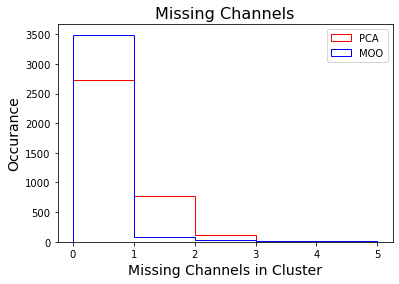

In [184]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

array = plt.hist(naive.get_clusterdf()['MissingCh'], np.linspace(0,5,6), color='r', histtype='step', label="PCA")
array = plt.hist(moo.get_clusterdf()['MissingCh'], np.linspace(0,5,6), color='b', histtype='step', label='MOO')

plt.legend()

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


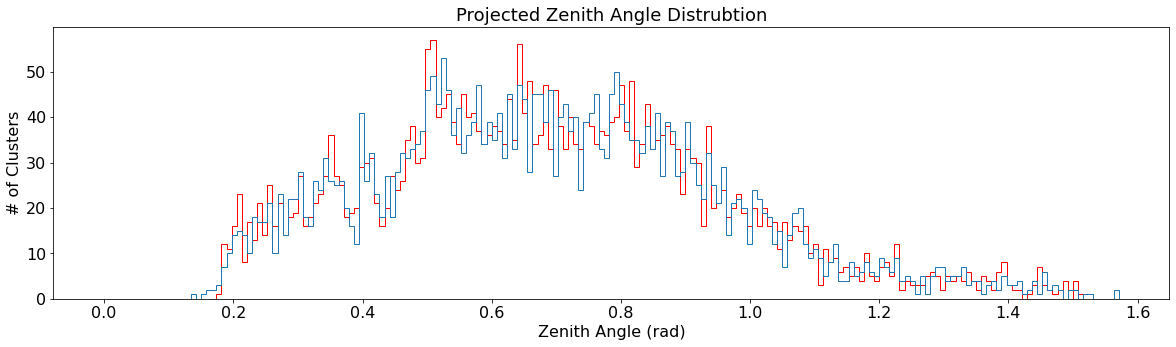

In [185]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Projected Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist(mc.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,200), histtype='step', color='r')
array=plt.hist(moo.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,200), histtype='step')
#array=plt.hist(naive.get_clusterdf()['Zenith'], np.linspace(0,math.pi/2,20), histtype='step')





#plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

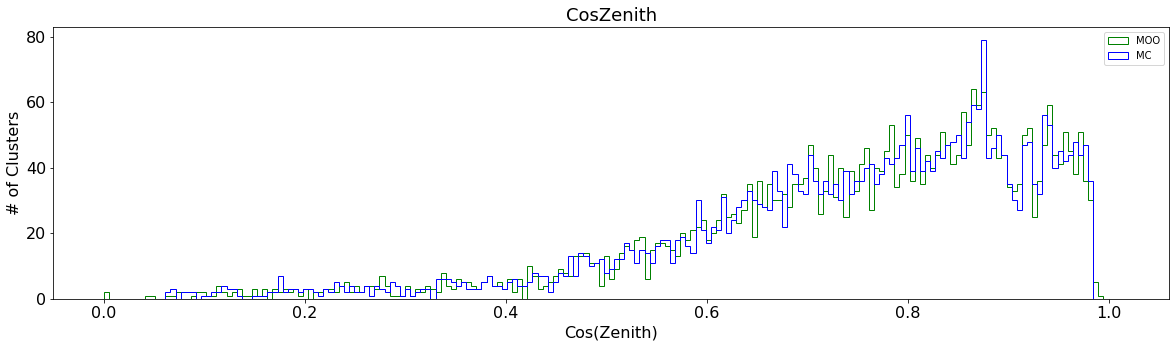

In [186]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("CosZenith", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
#array = plt.hist([math.cos(x) for x in naive.get_clusterdf()['Zenith']], np.linspace(0,1.01,500), histtype='step', color='r', label='PCA')
array = plt.hist([math.cos(x) for x in moo.get_clusterdf()['Zenith']], np.linspace(0,1.01,200), histtype='step', color='g', label='MOO')
array = plt.hist([math.cos(x) for x in mc.get_clusterdf()['Zenith']], np.linspace(0,1.01,200), histtype='step', color='b', label="MC")

#plt.gca().set_yscale("log")

plt.legend()


#plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

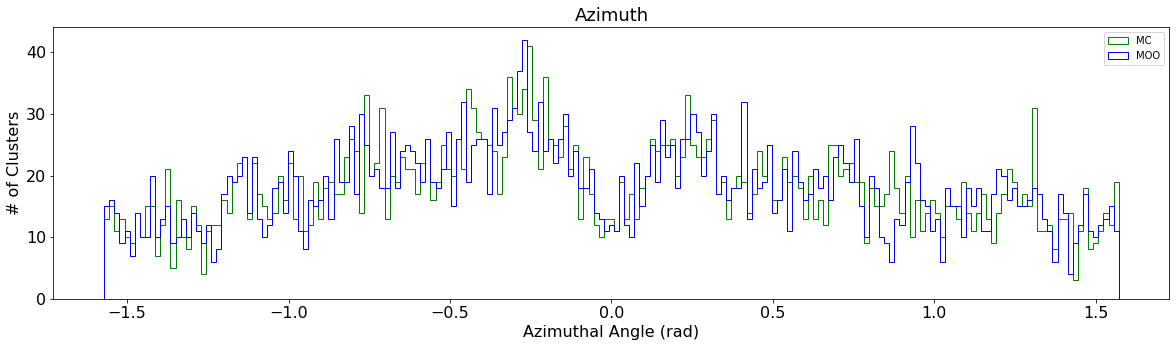

In [187]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (rad)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

array=plt.hist(mc.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,200), histtype='step', color='g', label="MC")
array=plt.hist(moo.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,200), histtype='step', color='b', label="MOO")
#array=plt.hist(naive.get_clusterdf()['Azimuth'], np.linspace(-math.pi/2,math.pi/2,500), histtype='step', color='r', label="PCA")

#plt.gca().set_yscale("log")


plt.legend()


#plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

In [188]:
moo.get_clusterdf()['StartTime'].values == mc.get_clusterdf()['StartTime'].values

array([ True, False,  True, ...,  True,  True,  True])

In [189]:
np.setdiff1d(mc.get_clusterdf()['Cluster'].values ,moo.get_clusterdf()['Cluster'].values)

array([], dtype=int64)

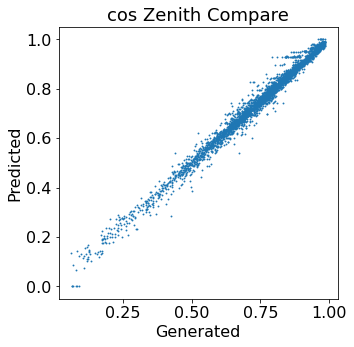

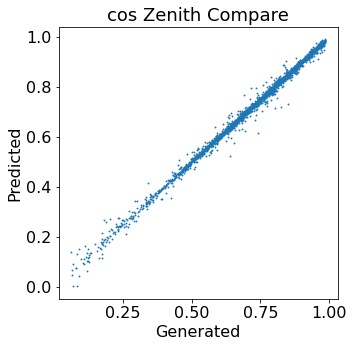

In [190]:

plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("cos Zenith Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter([math.cos(x) for x in mc.get_clusterdf()['Zenith']], [math.cos(x) for x in naive.get_clusterdf()['Zenith']], s=3, marker='.')


plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("cos Zenith Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter([math.cos(x) for x in mc.get_clusterdf()['Zenith']], [math.cos(x) for x in moo.get_clusterdf()['Zenith']], s=3, marker='.')
#array = plt.scatter([math.cos(x) for x in mc.get_clusterdf()['Zenith']], [math.cos(moo.get_clusterdf()[moo.get_clusterdf()['Cluster'] == i]['Zenith']) for i in mc.get_clusterdf()['Cluster'].values], s=3, marker='.')





In [191]:
moo_zenith_deltas = []
naive_zenith_deltas = []

for i in range(len(mc.get_clusterdf())):
    moo_z = np.cos(moo.get_clusterdf()['Zenith'].values[i])
    naive_z = np.cos(naive.get_clusterdf()['Zenith'].values[i])
    mc_z = np.cos(mc.get_clusterdf()['Zenith'].values[i])
    
    moo_zenith_deltas.append(abs(moo_z - mc_z) * 180/np.pi)
    naive_zenith_deltas.append(abs(naive_z - mc_z) * 180 / np.pi)
    
print(np.mean(moo_zenith_deltas))
print(np.mean(naive_zenith_deltas))

0.31045922317346025
0.7902015565598258


Text(0.5, 0, 'degrees')

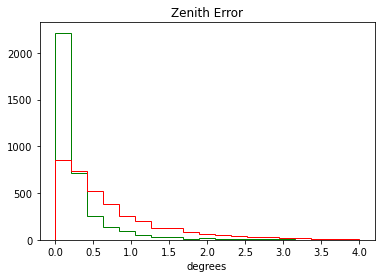

In [192]:
plt.title("Zenith Error")

plt.hist(moo_zenith_deltas, np.linspace(0,4,20), histtype='step', color="g", label='MOO')
array = plt.hist(naive_zenith_deltas, np.linspace(0,4,20), histtype='step', color='r', label="PCA")

plt.xlabel("degrees")

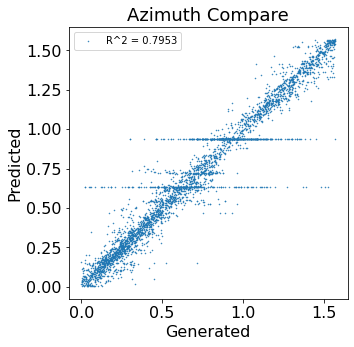

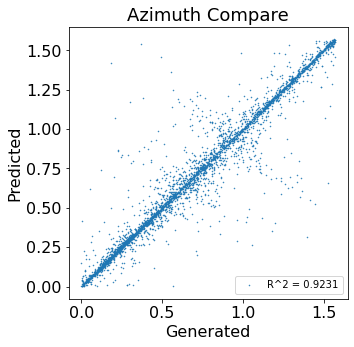

In [193]:
#mc_df = mc.get_clusterdf()[mc.get_clusterdf()['Zenith'] >= .4]
#moo_df = moo.get_clusterdf()[moo.get_clusterdf()['Cluster'].isin(mc_df['Cluster'].values)]
#naive_df = naive.get_clusterdf()[naive.get_clusterdf()['Cluster'].isin(mc_df['Cluster'].values)]

#naive_df = naive.get_clusterdf()[abs(naive.get_clusterdf()['Zenith']) > .01]
#moo_df = moo.get_clusterdf()[moo.get_clusterdf()['Cluster'].isin(naive_df['Cluster'].values)]
#mc_df = mc.get_clusterdf()[mc.get_clusterdf()['Cluster'].isin(naive_df['Cluster'].values)]


plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

r2_naive = (np.corrcoef(mc.get_clusterdf()['Azimuth'].values, naive.get_clusterdf()['Azimuth'].values)[0,1])**2
r2_naive = np.round(r2_naive, decimals = 4)

label = "R^2 = {}".format(r2_naive)

array = plt.scatter(abs(mc.get_clusterdf()['Azimuth']), abs(naive.get_clusterdf()['Azimuth']), s=1, marker='.', label=label)
plt.legend()



plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

r2_moo = (np.corrcoef(mc.get_clusterdf()['Azimuth'].values, moo.get_clusterdf()['Azimuth'].values)[0,1])**2
r2_moo = np.round(r2_moo, decimals = 4)

label = "R^2 = {}".format(r2_moo)

plt.scatter(abs(mc.get_clusterdf()['Azimuth']), abs(moo.get_clusterdf()['Azimuth']), s=1, marker='.', label=label)
plt.legend()

In [194]:
moo_azimuth_deltas = []
naive_azimuth_deltas = []

for i in range(len(mc.get_clusterdf())):
    moo_az = abs(moo.get_clusterdf()['Azimuth'].values[i])
    naive_az = abs(naive.get_clusterdf()['Azimuth'].values[i])
    mc_az = abs(mc.get_clusterdf()['Azimuth'].values[i])
    
    moo_azimuth_deltas.append(abs(moo_az - mc_az) * 180/np.pi)
    naive_azimuth_deltas.append(abs(naive_az - mc_az) * 180 / np.pi)
    
    #if abs(moo_az - mc_az) * 180/np.pi > 30:
    #    print(moo.get_clusterdf()['Cluster'].values[i])
    
print(np.mean(moo_azimuth_deltas))
print(np.mean(naive_azimuth_deltas))

2.8792161504686113
3.7845888444402314


In [24]:
#moo.get_clusterdf()[moo.get_clusterdf()['Cluster']==3133]

In [25]:
#sorted(moo_azimuth_deltas, reverse=True)

In [ ]:
plt.title("Azimuth Error")

array = plt.hist(moo_azimuth_deltas, np.linspace(0,6,60), histtype='step')
array =plt.hist(naive_azimuth_deltas, np.linspace(0,6,60), histtype='step')

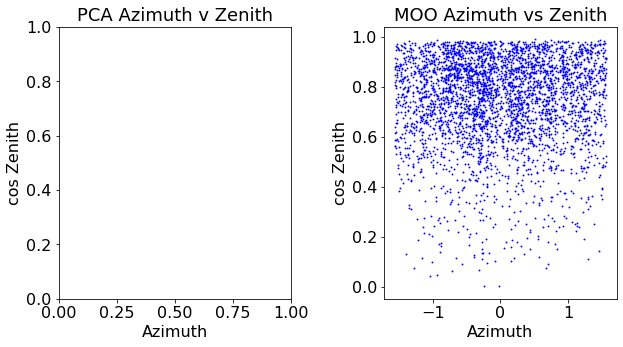

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax1.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax1.set_title("PCA Azimuth v Zenith", fontsize=18)
ax1.set_ylabel('cos Zenith',fontsize=16)
ax1.set_xlabel('Azimuth',fontsize=16)

#array = ax1.scatter(naive.get_clusterdf()['Azimuth'], [math.cos(x) for x in naive.get_clusterdf()['Zenith']], marker='.', s=3, color='r')


#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
ax2.tick_params(labelsize=16) #adjust fontsize of axis ticks
ax2.set_title("MOO Azimuth vs Zenith", fontsize=18)
ax2.set_ylabel('cos Zenith',fontsize=16)
ax2.set_xlabel('Azimuth',fontsize=16)

array = ax2.scatter(moo.get_clusterdf()['Azimuth'],[math.cos(x) for x in moo.get_clusterdf()['Zenith']], color='b',marker='.', s=3)




Text(0.5, 0, 'R^2')

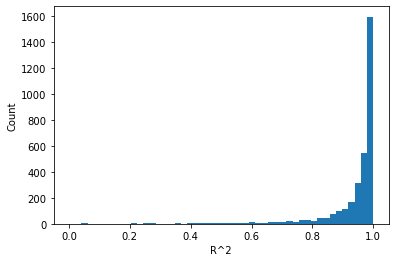

In [28]:
array = plt.hist(moo.get_clusterdf()[(moo.get_clusterdf()['MissingCh'] == 0) & (moo.get_clusterdf()['ExtraCh']==0)]['dEdx_err'], np.linspace(0,1,50))
plt.ylabel("Count")
plt.xlabel("R^2")

#plt.yscale("log")

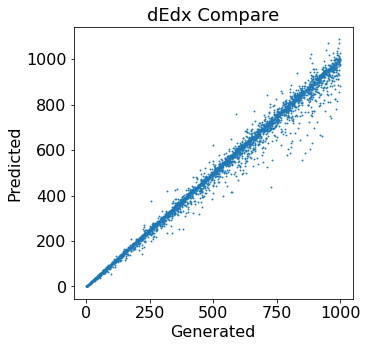

In [29]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("dEdx Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter(mc.get_clusterdf()['dEdx'], moo.get_clusterdf()['dEdx'], s=3, marker='.')
#array = plt.scatter([math.cos(x) for x in mc.get_clusterdf()['Zenith']], [math.cos(moo.get_clusterdf()[moo.get_clusterdf()['Cluster'] == i]['Zenith']) for i in mc.get_clusterdf()['Cluster'].values], s=3, marker='.')






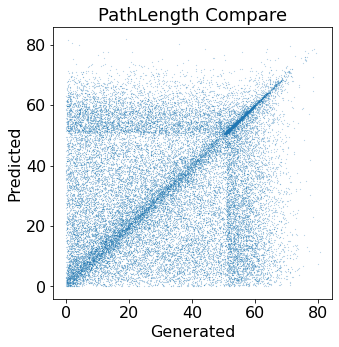

In [78]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("PathLength Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)

array = plt.scatter(mc.get_eventdf()['PathLength'], moo.get_eventdf()['PathLength'], s=.05, marker='.')
#array = plt.scatter([math.cos(x) for x in mc.get_clusterdf()['Zenith']], [math.cos(moo.get_clusterdf()[moo.get_clusterdf()['Cluster'] == i]['Zenith']) for i in mc.get_clusterdf()['Cluster'].values], s=3, marker='.')




In [153]:
a = (moo.get_eventdf()['PathLength'].values - mc.get_eventdf()['PathLength'].values) / mc.get_eventdf()['PathLength'].values

a = a[np.logical_not(np.isnan(a))]
np.std(a[:25000])

60.81701800861821

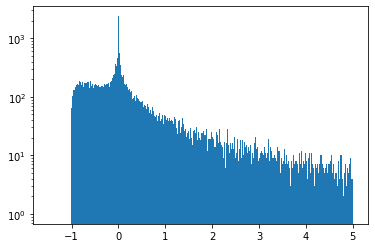

In [126]:
array = plt.hist((moo.get_eventdf()['PathLength'].values - mc.get_eventdf()['PathLength'].values) / mc.get_eventdf()['PathLength'].values, np.linspace(-1.5,5,500))
plt.yscale('log')

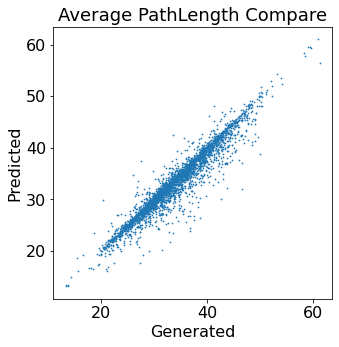

In [31]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Average PathLength Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)


avg_predicted = []
avg_generated = []

for c in mc.get_eventdf()['Cluster'].unique():
    avg_predicted.append(np.mean(mc.get_cluster(c)['PathLength'].values))
    avg_generated.append(np.mean(moo.get_cluster(c)['PathLength'].values))
    

array = plt.scatter(avg_generated, avg_predicted, s=2, marker='.')


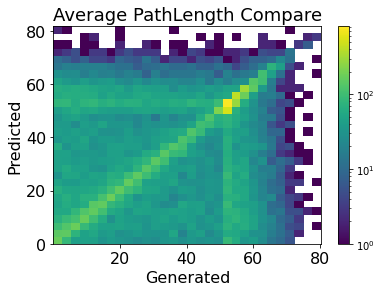

In [69]:
fig, ax = plt.subplots() # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Average PathLength Compare", fontsize=18)
plt.ylabel('Predicted',fontsize=16)
plt.xlabel('Generated',fontsize=16)


h = ax.hist2d(np.nan_to_num(mc.get_eventdf()['PathLength'].values, copy=True, nan=0.0), np.nan_to_num(moo.get_eventdf()['PathLength'], copy=True, nan=0.0), bins=[30,30], norm=LogNorm())
fig.colorbar(h[3], ax=ax)

In [ ]:
# Build this into MonteCarlo class??

import copy

moo_theta_deltas = []
naive_theta_deltas = []

for c in moo.get_clusterdf()['Cluster'].values:
    
    #mcfit = copy.deepcopy(mc.get_clusterdf()).iloc[i]['Fitline']
    #moofit = copy.deepcopy(moo.get_clusterdf()).iloc[i]['Fitline']
    
    mcfit = copy.copy(mc.get_fitline(c))
    moofit = copy.copy(moo.get_fitline(c))
    nfit = copy.copy(naive.get_fitline(c))

    v_mc = mcfit[3:]
    v_mc /= np.linalg.norm(v_mc)

    v_moo = moofit[3:]
    v_moo /= np.linalg.norm(v_moo)
    
    v_n = nfit[3:]
    v_n /= np.linalg.norm(v_n)

    if v_mc.dot(v_moo) < 0:
        v_moo *= -1
        
    if v_mc.dot(v_n) < 0:
        v_n *= -1

    theta = np.arccos(v_mc.dot(v_moo)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * math.pi)
    
    moo_theta_deltas.append(theta)
    
    #if theta > 8:
    #    print(c)
    
    
    theta = np.arccos(v_mc.dot(v_n)) #/ (np.linalg.norm(v_mc) * np.linalg.norm(v_moo))
    theta = theta * 360 / (2 * math.pi)
    
    naive_theta_deltas.append(theta)
    
print(np.mean(naive_theta_deltas))
print(np.mean(moo_theta_deltas))

In [ ]:
plt.figure()
plt.title("Delta-Error Theta in Track Vector")

plt.ylabel("Count")
plt.xlabel("Delta (degrees)")

array = plt.hist(moo_theta_deltas, np.linspace(0,15, 30),  histtype='step', color='g', label="MOO")
array = plt.hist(naive_theta_deltas, np.linspace(0,15, 30), histtype='step', color='r', label="PCA")

plt.legend()

#plt.gca().set_yscale("log")

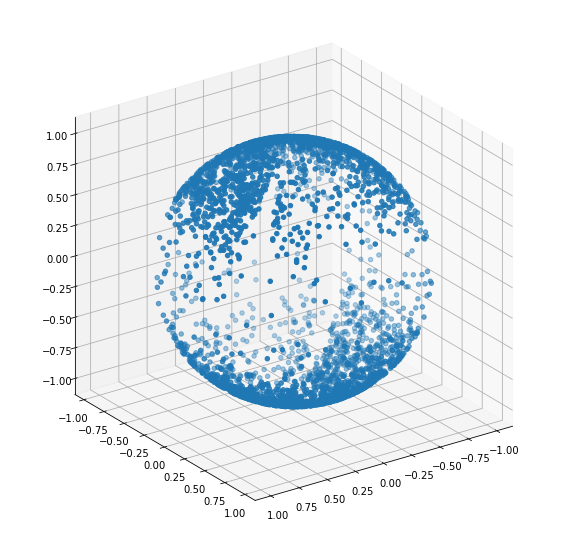

In [70]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_proj_type('ortho')

ax.scatter3D(*np.concatenate(moo.get_clusterdf()['Fitline'].values).reshape(-1,6)[:,3:].T)

#plt.xlim([-1,1])
#plt.ylim([-1,1])
#ax.set_zlim([-350,350])

#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')

ax.view_init(25, 55)

plt.show()

NameError: name 'data' is not defined

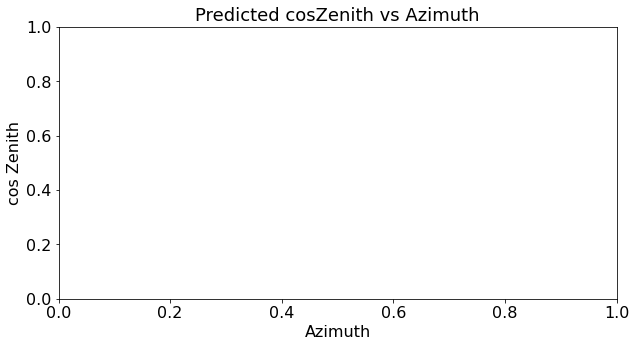

In [71]:
fig, ax = plt.subplots(figsize=(10,5))

#plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Predicted cosZenith vs Azimuth", fontsize=18)
plt.ylabel('cos Zenith',fontsize=16)
plt.xlabel('Azimuth',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], [math.cos(x) for x in data.get_clusterdf()['Zenith']])

xdata= data.get_clusterdf()['Azimuth'].values
ydata= [math.cos(x) for x in data.get_clusterdf()['Zenith'].values]
#x_bins= np.linspace(-math.pi/2,math.pi/2,20)
#y_bins= np.linspace(0,1,20)

counts,_,_= np.histogram2d(xdata, ydata, weights=theta_deltas, bins=(x_bins, y_bins))

pcolor=ax.pcolormesh(x_bins, y_bins, counts,norm=LogNorm())
#cbar=fig.colorbar(pcolor)



#h = plt.hist2d(xdata, ydata, bins=12,  weights=theta_deltas, cmap='cividis', norm=LogNorm())
cbar= plt.colorbar()


In [167]:
a = [[1,2,3],[4,5,6]]

In [168]:
[x[::-1] for x in a[::-1]]

[[6, 5, 4], [3, 2, 1]]